In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,PowerTransformer
import statsmodels.api as sm
from statsmodels.regression.linear_model import OLS 
import warnings
warnings.filterwarnings('ignore')

In [54]:
df=pd.read_csv("CarPrice_Assignment.csv")

In [3]:
df.sample(5)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
123,124,-1,plymouth valiant,gas,std,four,wagon,fwd,front,103.3,...,122,2bbl,3.35,3.46,8.5,88,5000,24,30,8921.0
90,91,1,nissan gt-r,diesel,std,two,sedan,fwd,front,94.5,...,103,idi,2.99,3.47,21.9,55,4800,45,50,7099.0
103,104,0,nissan otti,gas,std,four,sedan,fwd,front,100.4,...,181,mpfi,3.43,3.27,9.0,152,5200,19,25,13499.0
20,21,0,chevrolet vega 2300,gas,std,four,sedan,fwd,front,94.5,...,90,2bbl,3.03,3.11,9.6,70,5400,38,43,6575.0
39,40,0,honda prelude,gas,std,four,sedan,fwd,front,96.5,...,110,1bbl,3.15,3.58,9.0,86,5800,27,33,8845.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [5]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [6]:
df.shape

(205, 26)

In [7]:
df['CompanyName']= [i[0] for i in df['CarName'].str.split(" ")]

In [8]:
df['CompanyName'].value_counts()

toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
volkswagen      9
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
isuzu           4
porsche         4
alfa-romero     3
chevrolet       3
jaguar          3
vw              2
maxda           2
renault         2
toyouta         1
vokswagen       1
Nissan          1
mercury         1
porcshce        1
Name: CompanyName, dtype: int64

In [9]:
df.duplicated().sum()
#there are no duplicate values

0

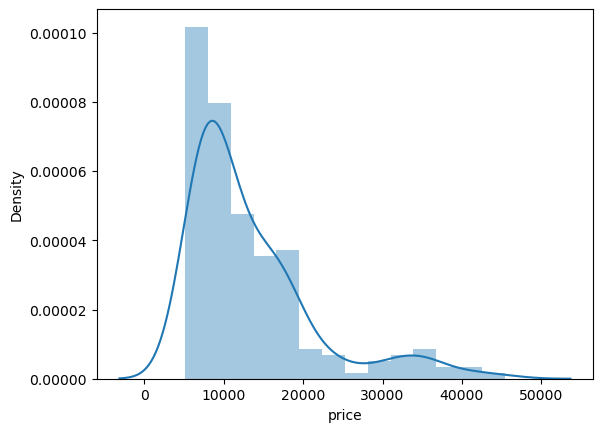

In [10]:
sns.distplot(df['price'])
plt.show()
#we can see mosst of the price is between 5000 to 15000
#there some orders in 30000 to 50000

<Axes: >

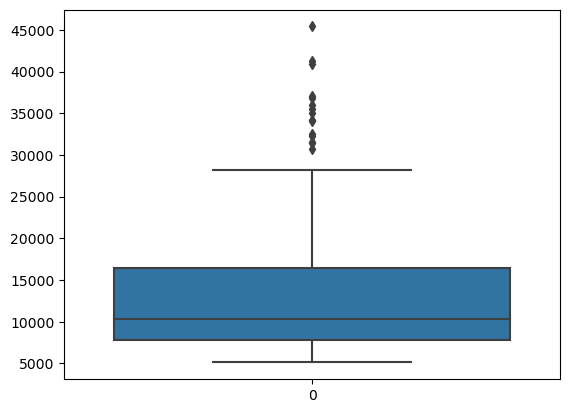

In [11]:
sns.boxplot(df['price'])
#outliers start from 30000 and the average is 11000

In [12]:
pt = PowerTransformer()

In [13]:
df['price']=pt.fit_transform(df[['price']])

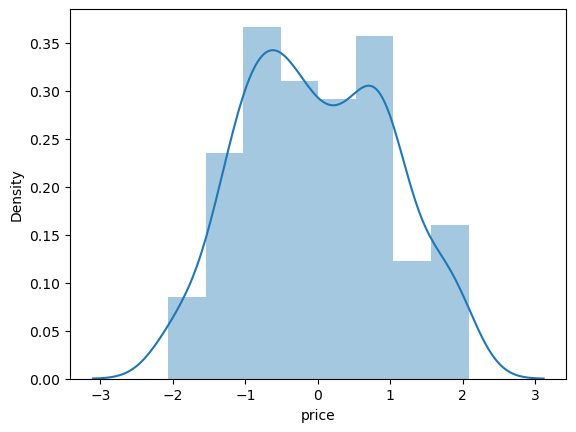

In [14]:
sns.distplot(df['price'])
plt.show()

In [55]:
x=df.drop(columns=['price'])
y=df['price']

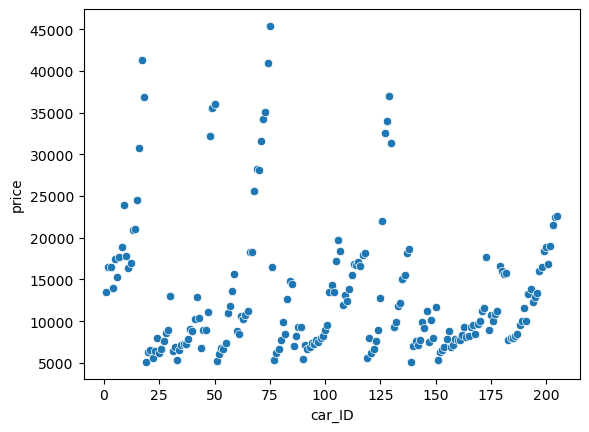

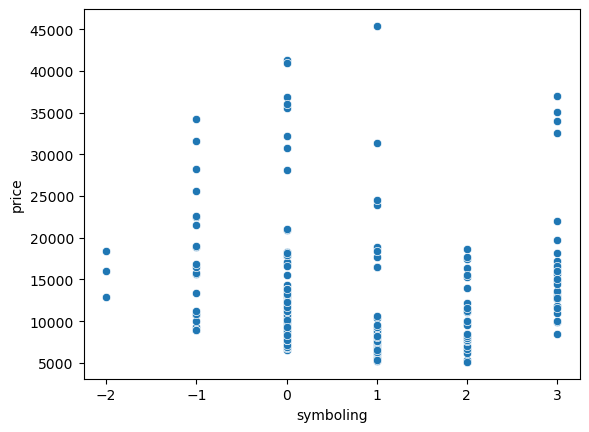

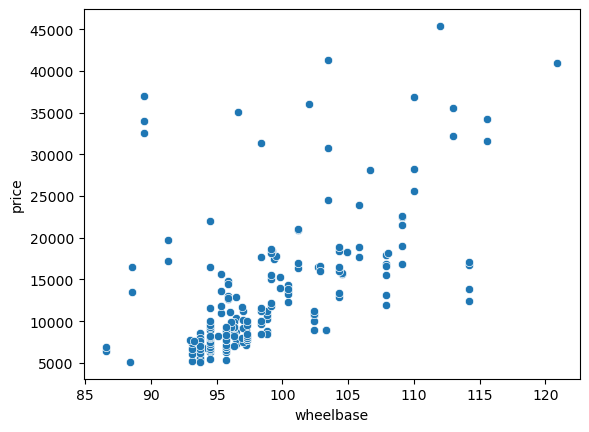

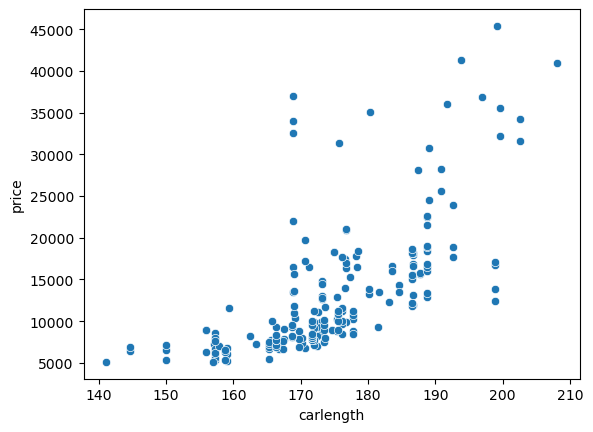

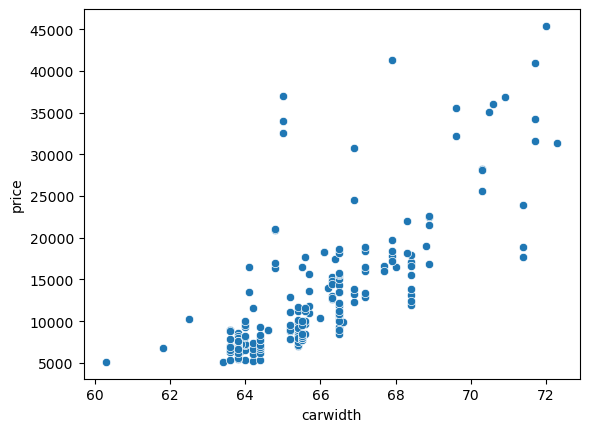

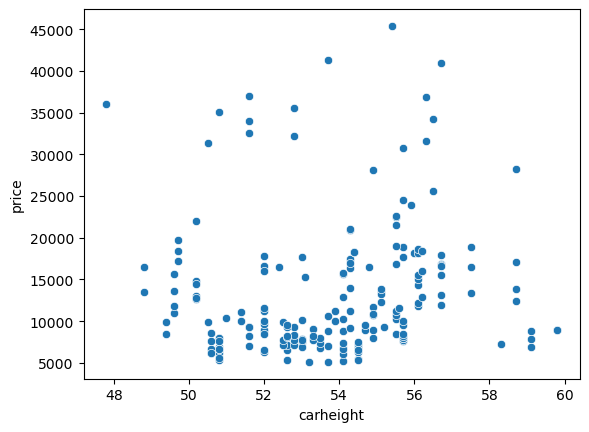

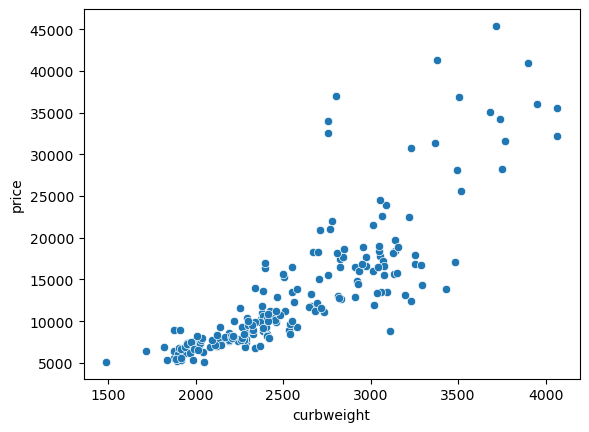

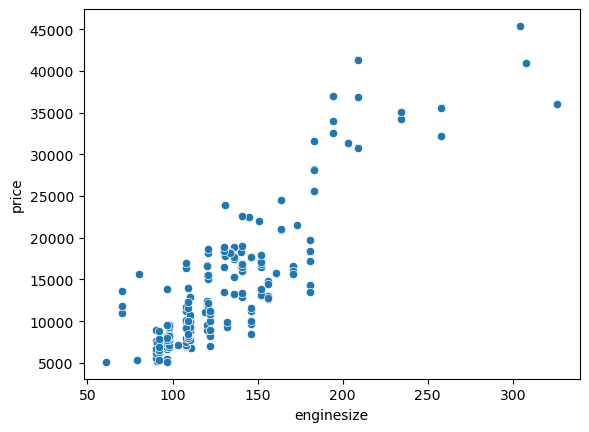

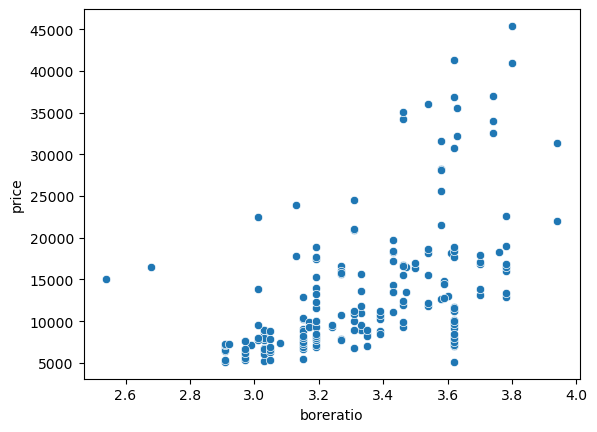

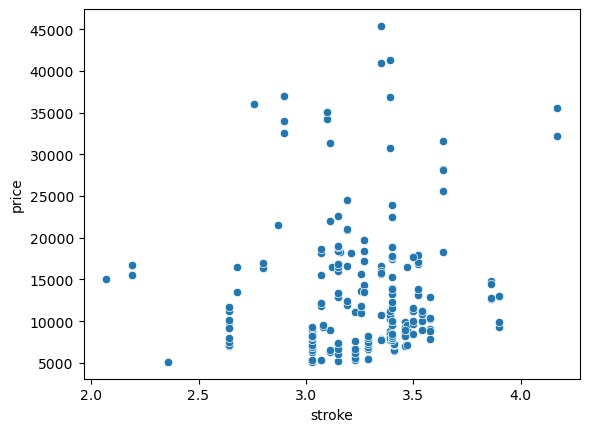

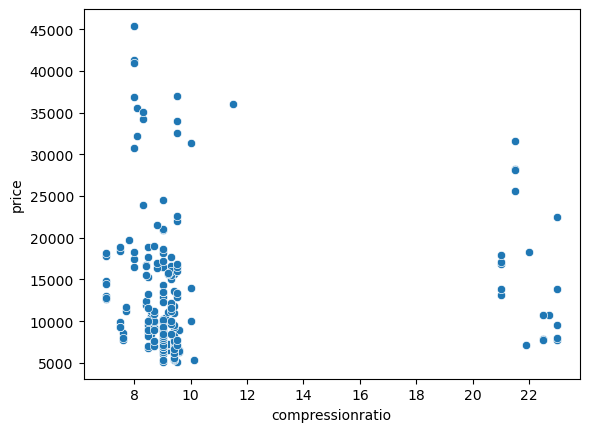

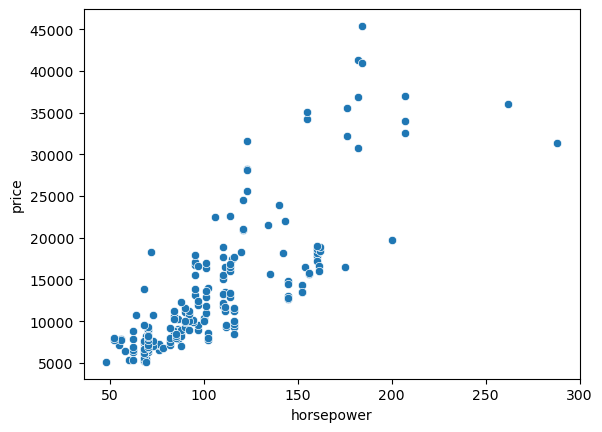

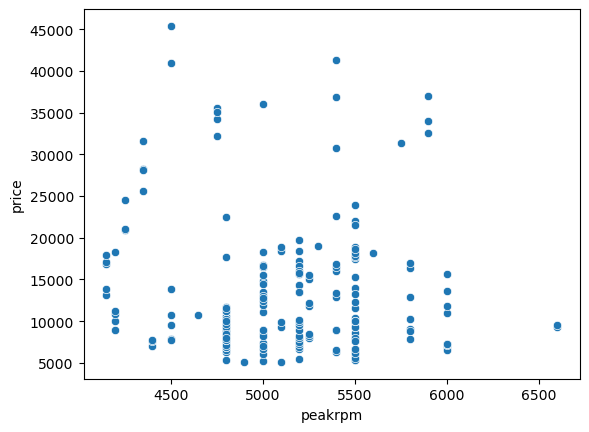

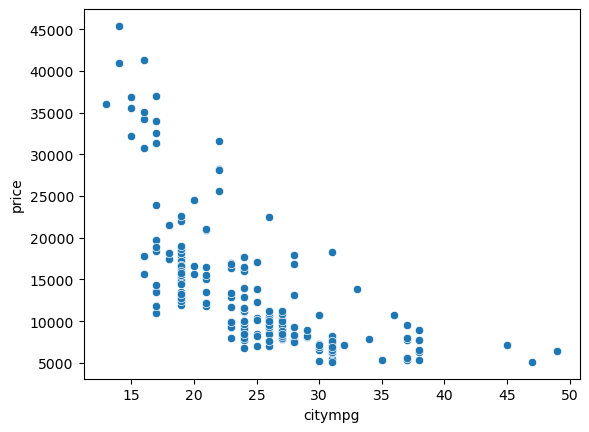

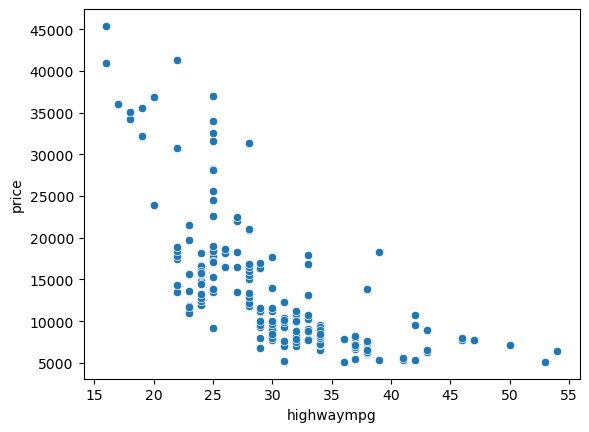

In [56]:
for i in x.select_dtypes(include='number'):
    sns.scatterplot(x=x[i],y=y)
    plt.xlabel(i)
    plt.ylabel('price')
    plt.show()

<Axes: >

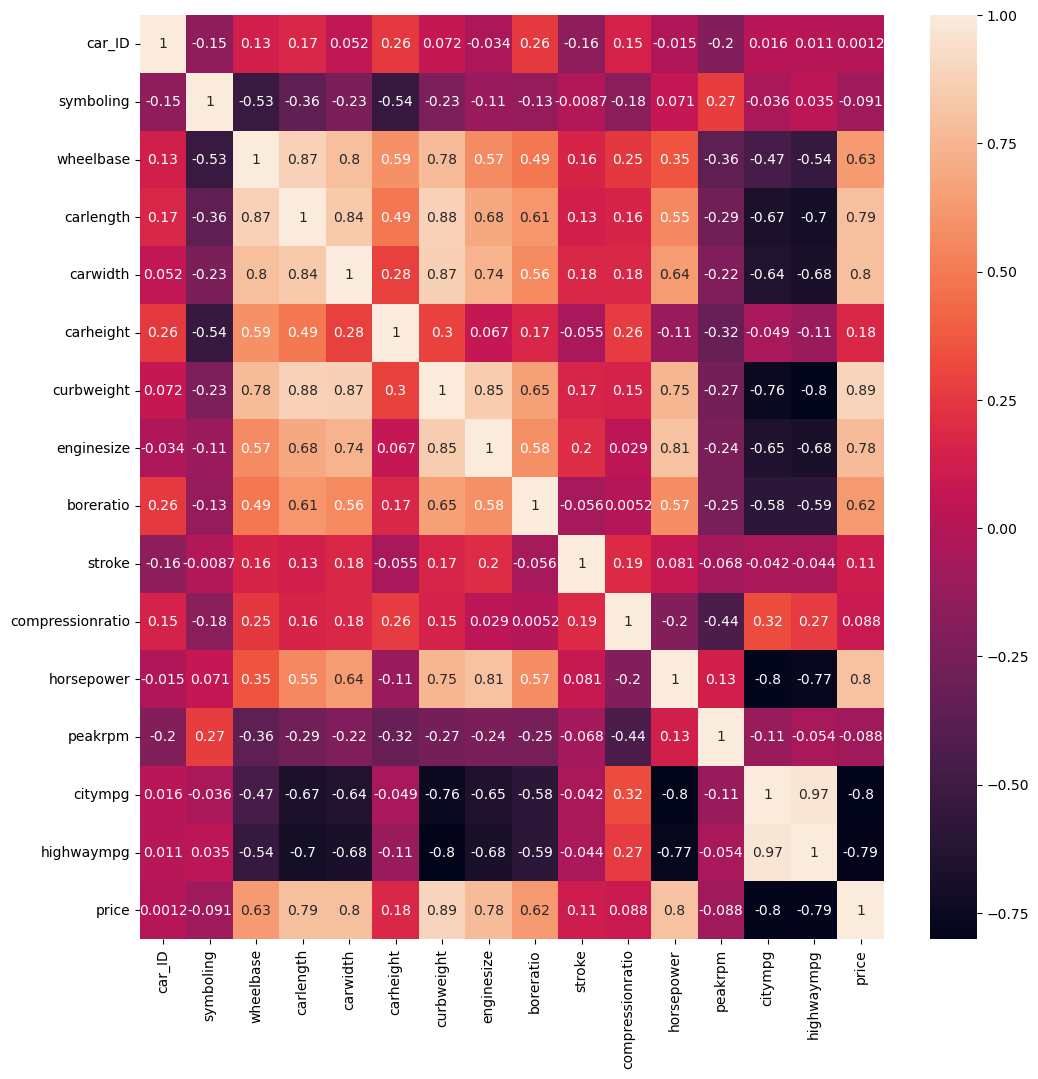

In [18]:
plt.figure(figsize=[12,12])
sns.heatmap(df.corr(),annot=True)
#there too many multicolinearity

In [20]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,2.050000e+02
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,-2.752053e-14
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,1.002448e+00
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,-2.068027e+00
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,-7.792298e-01
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,-9.242221e-02
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,8.271105e-01
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,2.080857e+00


In [21]:
df.describe(include='object')

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,CompanyName
count,205,205,205,205,205,205,205,205,205,205,205
unique,147,2,2,2,5,3,2,7,7,8,28
top,toyota corona,gas,std,four,sedan,fwd,front,ohc,four,mpfi,toyota
freq,6,185,168,115,96,120,202,148,159,94,31


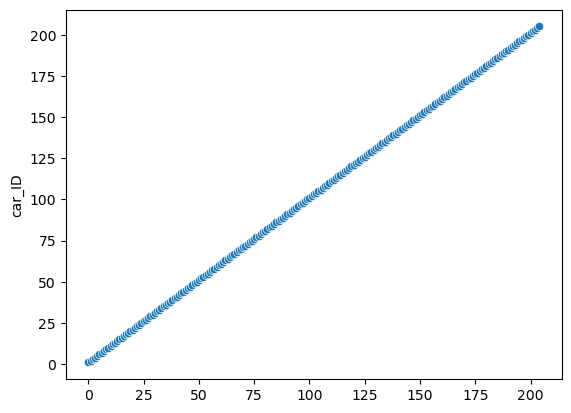

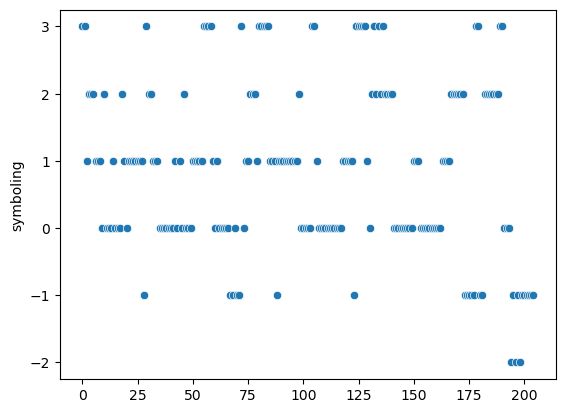

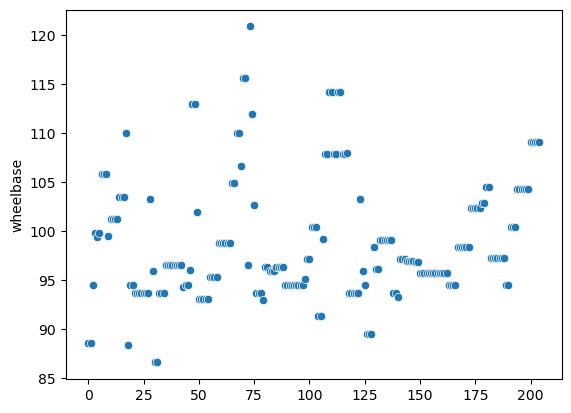

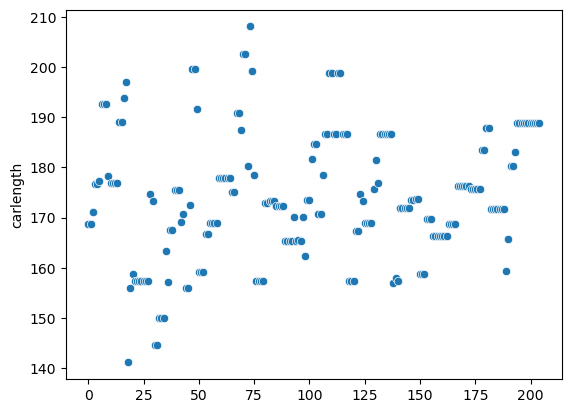

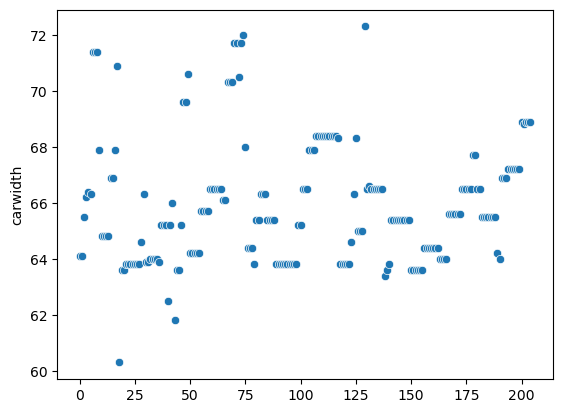

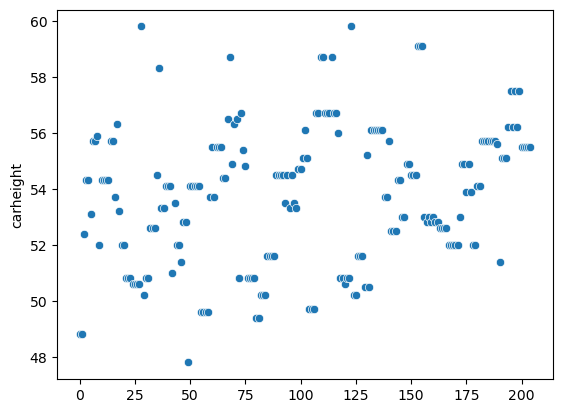

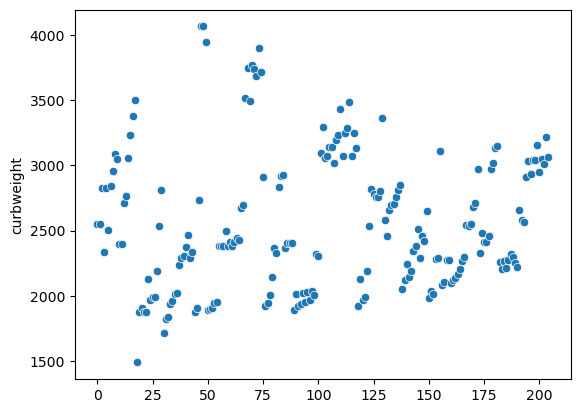

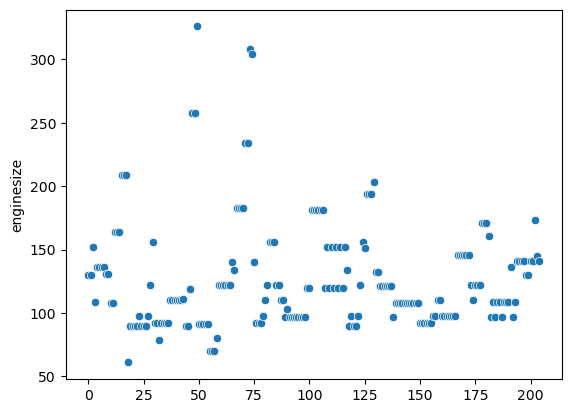

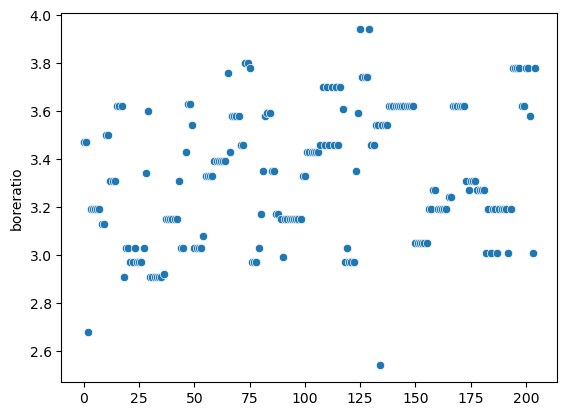

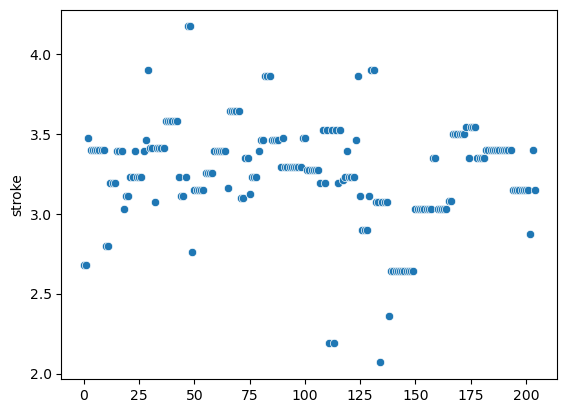

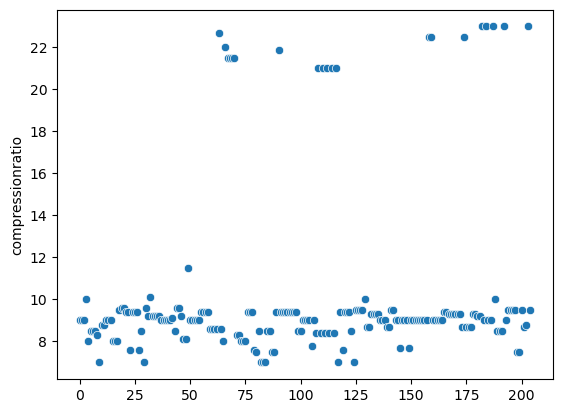

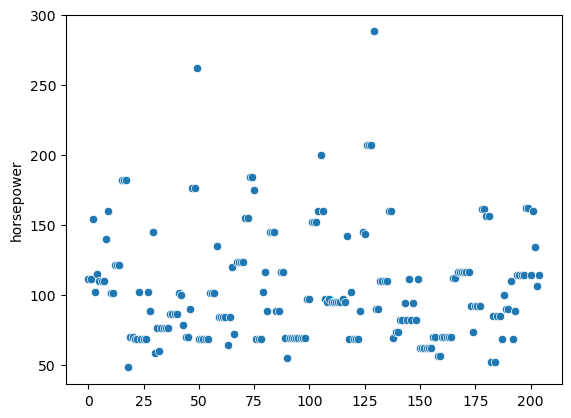

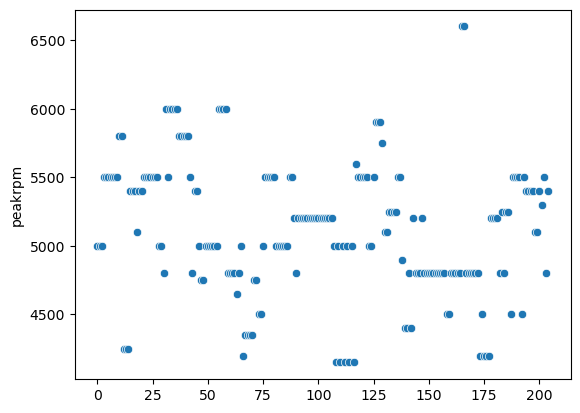

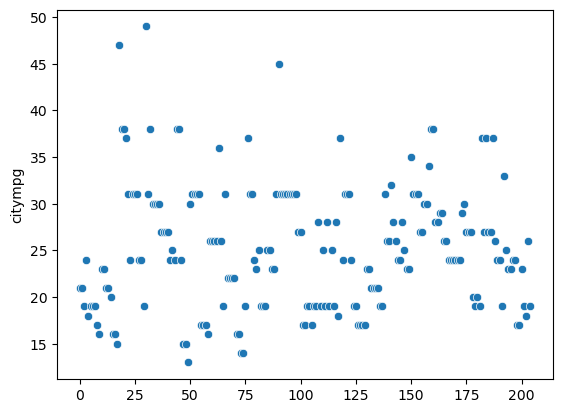

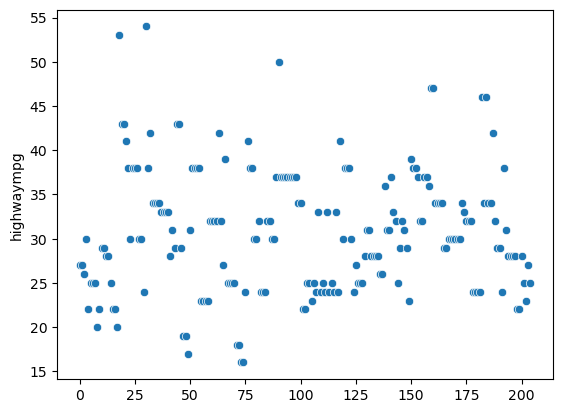

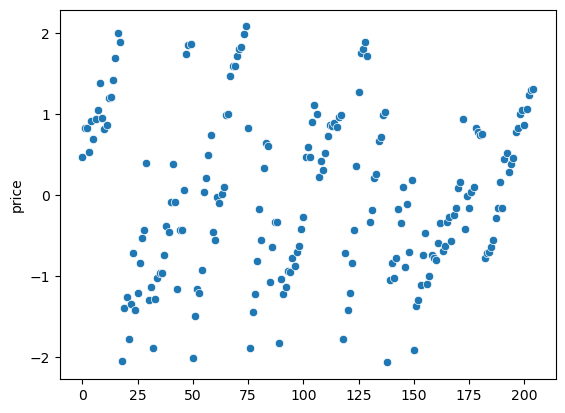

In [25]:
for i in df.select_dtypes(include='number'):
    sns.scatterplot(df[i])
    plt.show()

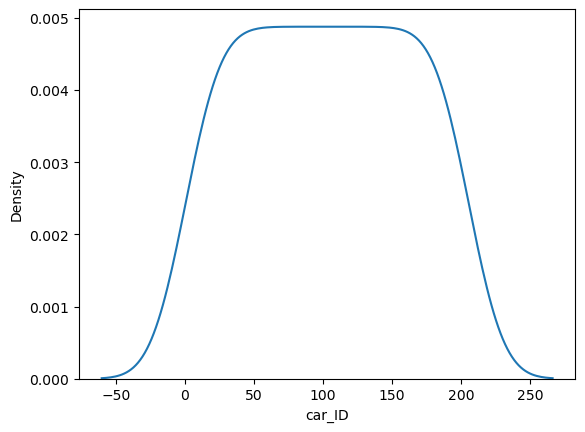

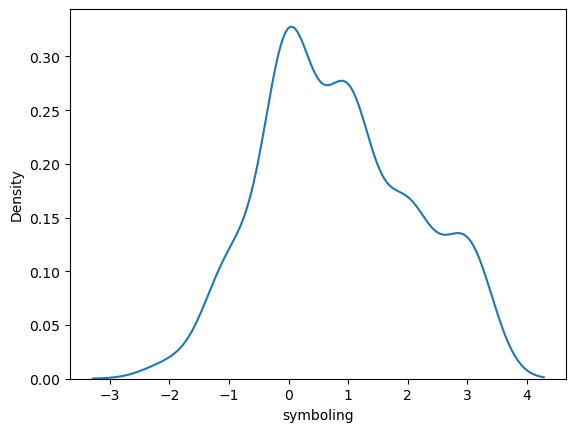

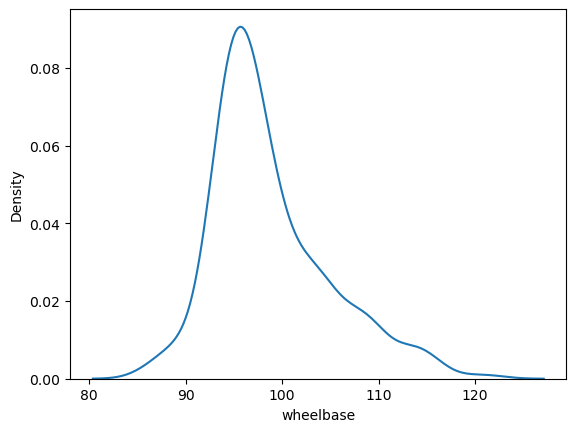

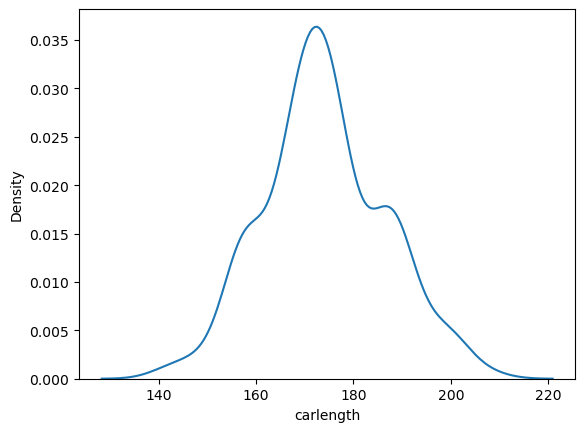

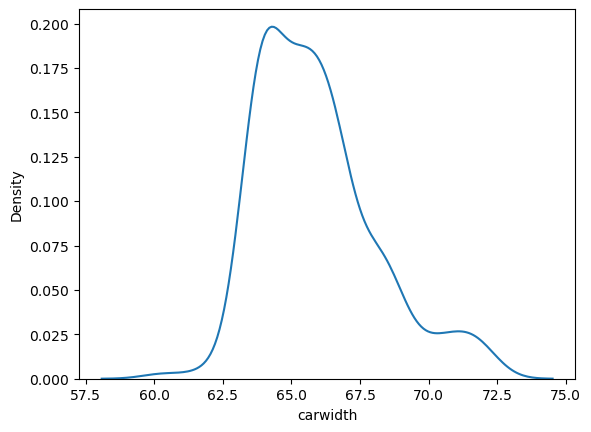

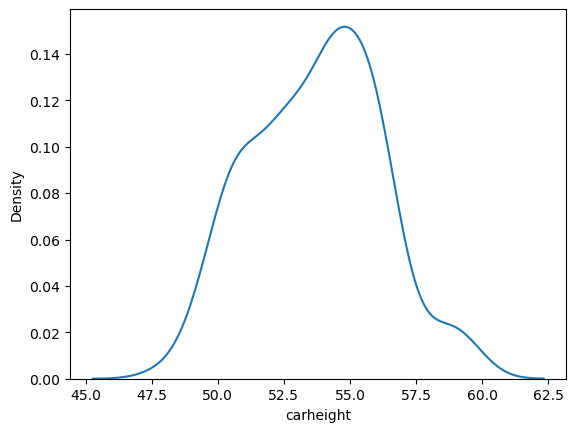

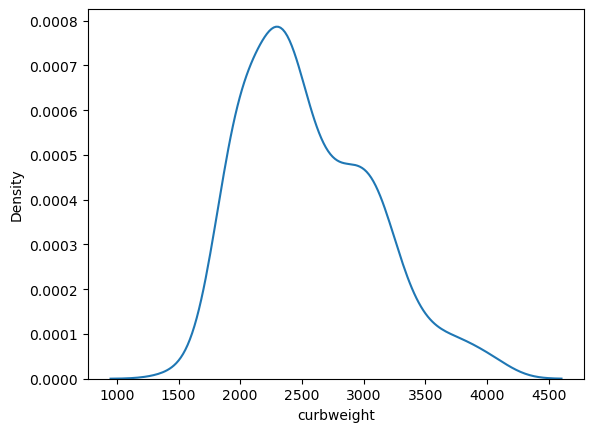

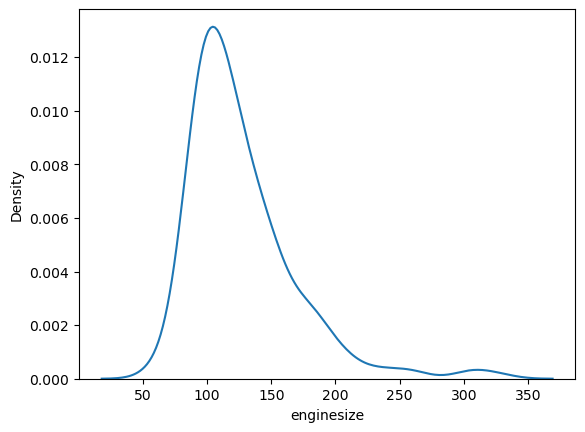

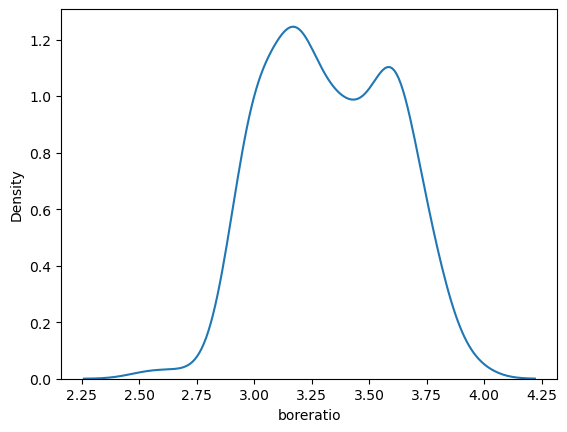

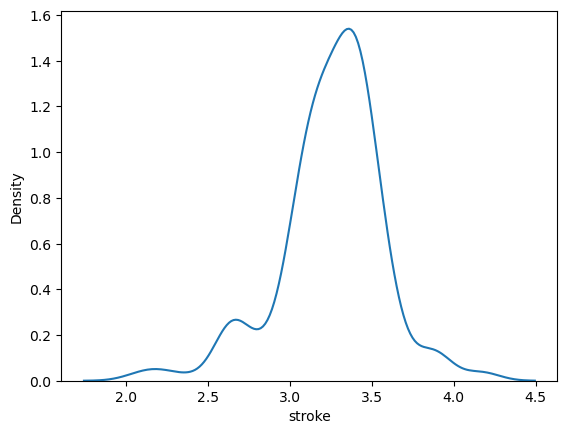

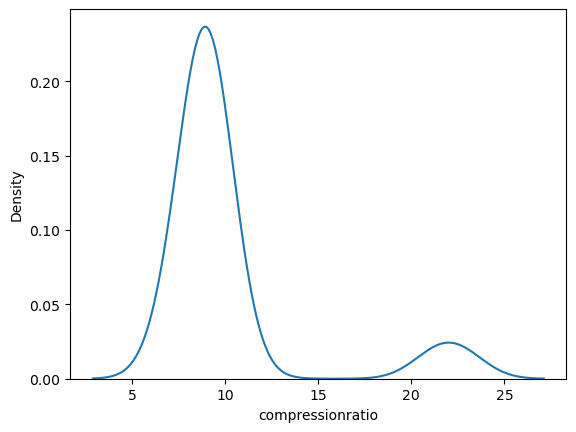

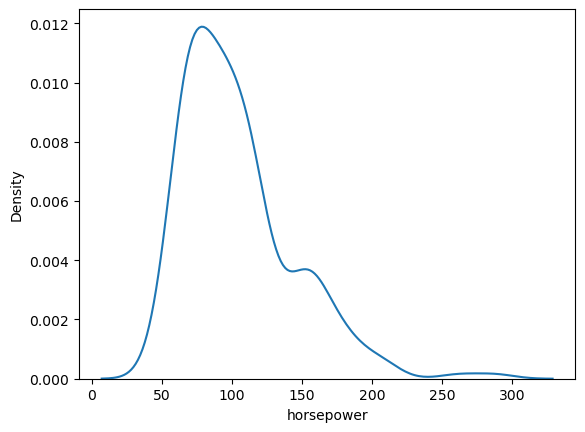

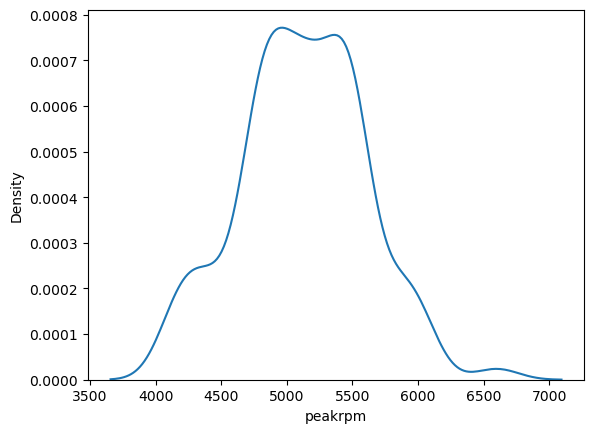

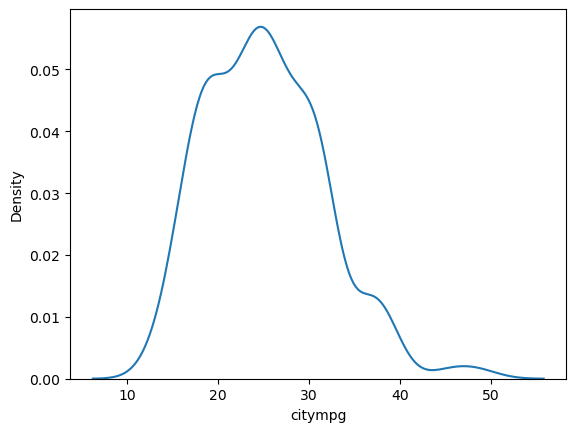

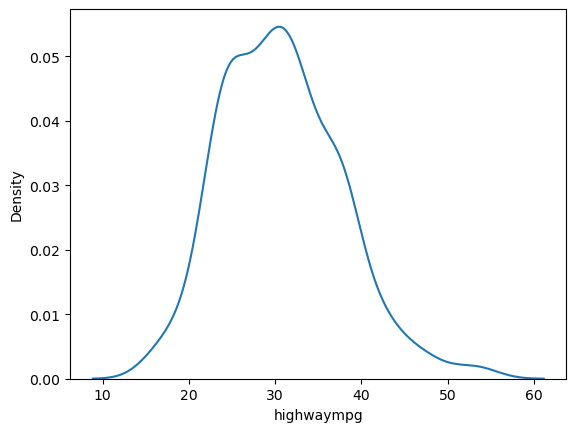

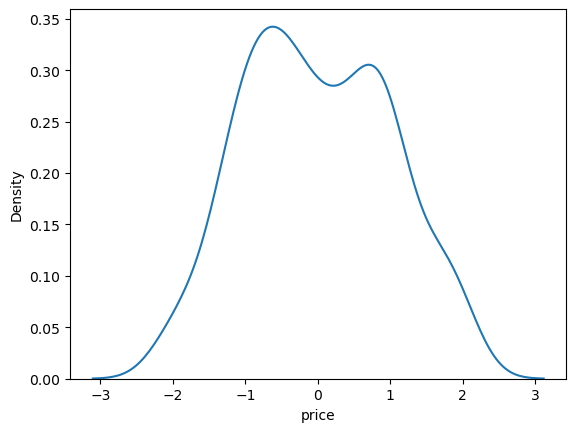

In [26]:
for i in df.select_dtypes(include='number'):
    sns.kdeplot(df[i])
    plt.show()

In [28]:
df.describe(include='object')

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,CompanyName
count,205,205,205,205,205,205,205,205,205,205,205
unique,147,2,2,2,5,3,2,7,7,8,28
top,toyota corona,gas,std,four,sedan,fwd,front,ohc,four,mpfi,toyota
freq,6,185,168,115,96,120,202,148,159,94,31


<Axes: xlabel='price', ylabel='stroke'>

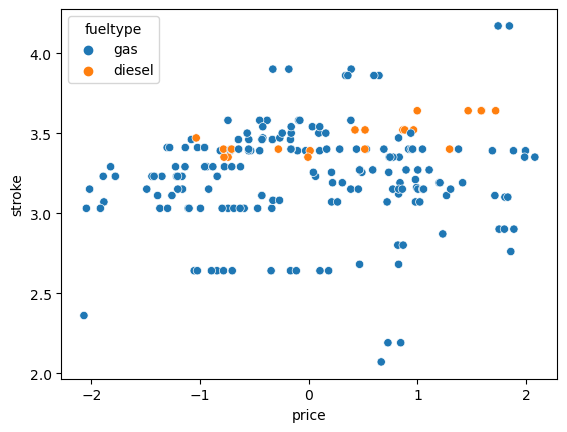

In [35]:
sns.scatterplot(x=df['price'],y=df['stroke'],hue=df['fueltype'])

In [57]:
x=x.drop(columns=['car_ID'])

In [58]:
x=pd.get_dummies(x,drop_first=False)

In [70]:
from sklearn.model_selection import train_test_split,GridSearchCV

In [60]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,train_size=0.3,random_state=10)

In [61]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error

In [66]:
rf = RandomForestRegressor(n_estimators=150,random_state=10,max_depth=10)

In [67]:
rf.fit(xtrain,ytrain)

RandomForestRegressor(max_depth=10, n_estimators=150, random_state=10)

In [68]:
pred=rf.predict(xtest)

In [69]:
mean_squared_error(ytest,pred,squared=False)

2817.7013914003837

In [91]:
param = { 'max_depth':[15],
         'n_estimators':[100,200],
         'min_samples_split':[3,2],
         'max_features':['sqrt']
}

In [92]:
rf = GridSearchCV(estimator=RandomForestRegressor(random_state=10),param_grid=param,scoring='neg_root_mean_squared_error',verbose=2)

In [93]:
rf.fit(xtrain,ytrain)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END max_depth=15, max_features=sqrt, min_samples_split=3, n_estimators=100; total time=   0.1s
[CV] END max_depth=15, max_features=sqrt, min_samples_split=3, n_estimators=100; total time=   0.1s
[CV] END max_depth=15, max_features=sqrt, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_split=3, n_estimators=100; total time=   0.1s
[CV] END max_depth=15, max_features=sqrt, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_split=3, n_estimators=200; total time=   0.1s
[CV] END max_depth=15, max_features=sqrt, min_samples_split=3, n_estimators=200; total time=   0.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_split=3, n_estimators=200; total time=   0.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_split=3, n_estimators=200; total time=   0.2s
[CV] END max_depth=15, max_features=sqrt

GridSearchCV(estimator=RandomForestRegressor(random_state=10),
             param_grid={'max_depth': [15], 'max_features': ['sqrt'],
                         'min_samples_split': [3, 2],
                         'n_estimators': [100, 200]},
             scoring='neg_root_mean_squared_error', verbose=2)

In [94]:
rf.best_params_

{'max_depth': 15,
 'max_features': 'sqrt',
 'min_samples_split': 3,
 'n_estimators': 100}

In [95]:
ypred=rf.predict(xtest)

In [96]:
mean_squared_error(ytest,ypred,squared=False)

2906.9422334710302